# cuML - RAPIDS




## Installation

In [ ]:
# Run in case of errors in the regression benchmark
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!pip install cudf-cu12==23.08 cuml-cu12==23.08 aiohttp --extra-index-url=https://pypi.nvidia.com

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 438, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 438 (delta 121), reused 57 (delta 54), pack-reused 269
Receiving objects: 100% (438/438), 118.31 KiB | 5.38 MiB/s, done.
Resolving deltas: 100% (223/223), done.
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.2/503.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.8/961.8 MB 879.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 582.4/582.4 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.2 MB/s eta 0:00:00
     ━━

In [ ]:
# Run in case the developers fixed the regression benchemark issue
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!pip3 install --upgrade pip
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 438, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 438 (delta 121), reused 57 (delta 54), pack-reused 269
Receiving objects: 100% (438/438), 118.31 KiB | 984.00 KiB/s, done.
Resolving deltas: 100% (223/223), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
***********************************************************************
We will now install RAPIDS via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 955.2/955.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
num = 10000
w = 2.0
x = np.random.normal(size = (num))

In [ ]:
x, x.shape

(array([-0.42618216,  0.0096947 , -1.9916928 , ...,  0.92755302,
        -0.74792145, -0.96460978]),
 (10000,))

In [ ]:
b = 1.0
y = w * x + b

In [ ]:
y, y.shape

(array([ 0.14763569,  1.01938939, -2.9833856 , ...,  2.85510604,
        -0.49584289, -0.92921957]),
 (10000,))

In [ ]:
noise = np.random.normal(scale=2.0, size=(num))
y_noisy = y + noise

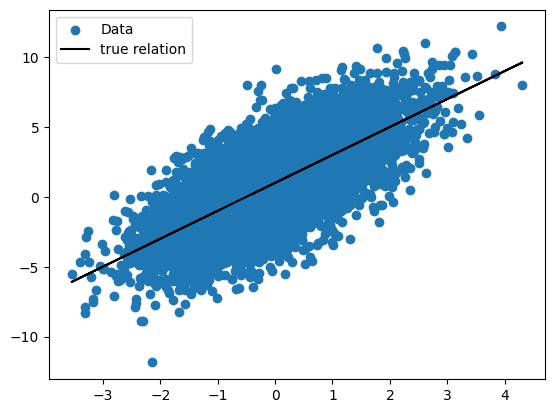

In [ ]:
plt.scatter(x, y_noisy, label = "Data")
plt.plot(x, y, color = 'black', label = 'true relation')
plt.legend();

## Simple linear regression


### Using scikit-Learn


In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
print(sklearn.__version__)

1.2.2


In [ ]:
linear_regression = LinearRegression()
type(linear_regression)

sklearn.linear_model._base.LinearRegression

In [ ]:
x.shape

(10000,)

In [ ]:
np.expand_dims(x, 1).shape

(10000, 1)

In [ ]:
linear_regression.fit(np.expand_dims(x, 1), y_noisy)

LinearRegression()

In [ ]:
inputs = np.linspace(start = -5, stop = 5, num = 1000000)

In [ ]:
inputs

array([-5.     , -4.99999, -4.99998, ...,  4.99998,  4.99999,  5.     ])

In [ ]:
outputs = linear_regression.predict(np.expand_dims(inputs, 1))
outputs

array([-8.89856361, -8.89854383, -8.89852405, ..., 10.87984763,
       10.8798674 , 10.87988718])

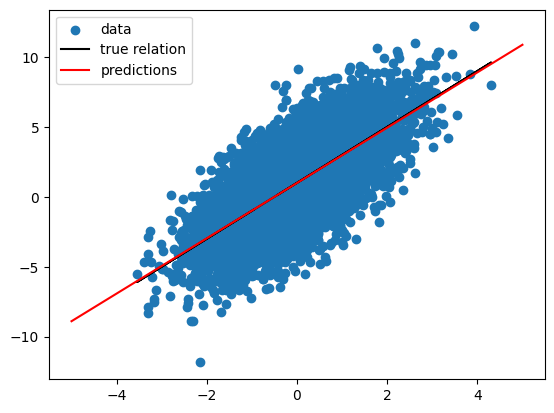

In [ ]:
plt.scatter(x, y_noisy, label = "data")
plt.plot(x, y, color = 'black', label = "true relation")
plt.plot(inputs, outputs, color = 'red', label = 'predictions')
plt.legend();

### Using cuML

In [ ]:
import cudf
print(cudf.__version__)

23.08.00


In [ ]:
df = cudf.DataFrame({"x": x, "y": y_noisy})
df

,x,y
0,-0.426182,2.585970
1,0.009695,-1.294703
2,-1.991693,-1.027097
3,-0.231171,-1.598733
4,0.484952,2.958737
...,...,...
9995,0.201330,5.608919
9996,0.571376,0.858187
9997,0.927553,1.893235
9998,-0.747921,0.680981


In [ ]:
type(df)

cudf.core.dataframe.DataFrame

In [ ]:
import cuml
print(cuml.__version__)
from cuml.linear_model import LinearRegression as LinearRegressionGPU

23.08.00


In [ ]:
df["x"]

0      -0.426182
1       0.009695
2      -1.991693
3      -0.231171
4       0.484952
          ...   
9995    0.201330
9996    0.571376
9997    0.927553
9998   -0.747921
9999   -0.964610
Name: x, Length: 10000, dtype: float64

In [ ]:
type(y_noisy), type(x)

(numpy.ndarray, numpy.ndarray)

In [ ]:
import cupy as cp
linear_regression_gpu = LinearRegressionGPU()
linear_regression_gpu.fit(cp.expand_dims(cp.array(df['x']), 1), cp.array(y_noisy))

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:190: UserWarning: Changing solver from 'eig' to 'svd' as eig solver does not support training data with 1 column currently.
  return func(*args, **kwargs)


LinearRegression()

In [ ]:
df_cudf = cudf.DataFrame({'inputs': inputs})
df_cudf

,inputs
0,-5.00000
1,-4.99999
2,-4.99998
3,-4.99997
4,-4.99996
...,...
999995,4.99996
999996,4.99997
999997,4.99998
999998,4.99999


In [ ]:
type(df_cudf)

cudf.core.dataframe.DataFrame

In [ ]:
outputs_gpu = linear_regression_gpu.predict(df_cudf[["inputs"]])

In [ ]:
type(outputs_gpu)

cupy.ndarray

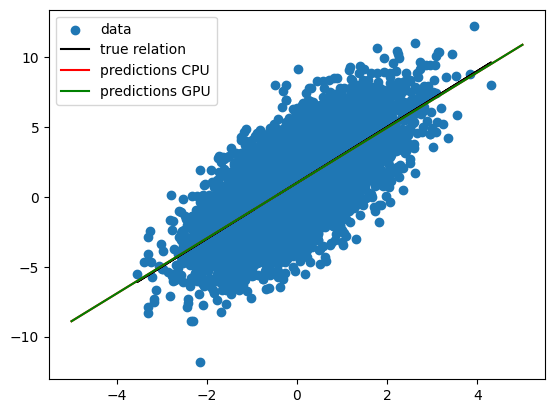

In [ ]:
plt.scatter(x, y_noisy, label = "data")
plt.plot(x, y, color = 'black', label = "true relation")
plt.plot(inputs, outputs, color = 'red', label = 'predictions CPU')
plt.plot(inputs, outputs_gpu.get(), color = "green", label = "predictions GPU")
plt.legend();

## Ridge Regression


- Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [ ]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [ ]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)

In [ ]:
X_train.shape, y_train.shape

((353, 10), (353,))

In [ ]:
X_test.shape, y_test.shape

((89, 10), (89,))

In [ ]:
from cuml import Ridge as cuRidge
from sklearn.linear_model import Ridge as skRidge

In [ ]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
alpha = np.array([1.0])
fit_intercept = True

ridge = skRidge(alpha = alpha, fit_intercept = fit_intercept, solver="cholesky")
ridge.fit(X_train, y_train)

Ridge(alpha=array([1.]), solver='cholesky')

> cuML

In [ ]:
X_train_cp = cp.array(X_train)
y_train_cp = cp.array(y_train)

In [ ]:
type(X_train_cp), type(y_train_cp)

(cupy.ndarray, cupy.ndarray)

In [ ]:
cuml_ridge = cuRidge(alpha = alpha, fit_intercept = fit_intercept, solver = "eig")
cuml_ridge.fit(X_train_cp, y_train_cp)

Ridge()

> cuML documentation: https://docs.rapids.ai/api/cuml/stable/api.html#regression-and-classification

## Predictions and evaluation

In [ ]:
X_test.shape, y_test.shape

((89, 10), (89,))

In [ ]:
type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [ ]:
print('sklearn: ' + str(ridge.score(X_test, y_test)))

sklearn: 0.4578254335183233


In [ ]:
print('cuML: ' + str(cuml_ridge.score(cp.array(X_test), cp.array(y_test))))

cuML: 0.4578254335183233


## Hyperparameter tuning

- Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
np.logspace(-3, -1, 10)

array([0.001     , 0.0016681 , 0.00278256, 0.00464159, 0.00774264,
       0.0129155 , 0.02154435, 0.03593814, 0.05994843, 0.1       ])

In [ ]:
params = {'alpha': np.logspace(-3, -1, 10)}

In [ ]:
grid = GridSearchCV(ridge, params, scoring="r2")
grid.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(alpha=array([1.]), solver='cholesky'),
             param_grid={'alpha': array([0.001     , 0.0016681 , 0.00278256, 0.00464159, 0.00774264,
       0.0129155 , 0.02154435, 0.03593814, 0.05994843, 0.1       ])},
             scoring='r2')

In [ ]:
grid.best_params_

{'alpha': 0.05994842503189409}

In [ ]:
grid.best_score_

0.4775568276216964

In [ ]:
grid.best_params_["alpha"]

0.05994842503189409

In [ ]:
ridge = skRidge(alpha = grid.best_params_["alpha"], fit_intercept=fit_intercept, solver = "cholesky")
ridge.fit(X_train, y_train)

Ridge(alpha=0.05994842503189409, solver='cholesky')

### Hyperparameters in cuML

In [ ]:
cuml_grid = GridSearchCV(cuml_ridge, params, scoring="r2")
cuml_grid.fit(X_train, y_train)
cuml_grid.best_params_, cuml_grid.best_score_

({'alpha': 0.05994842503189409}, 0.4775568276216964)

In [ ]:
cuml_ridge = cuRidge(alpha=cuml_grid.best_params_['alpha'], fit_intercept=fit_intercept, solver='eig')
cuml_ridge.fit(X_train_cp, y_train_cp)

Ridge()

# Performance comparison

- Documentation: https://github.com/rapidsai/cuml/blob/7d86042b8/python/cuml/benchmark/runners.py#L56

In [ ]:
from cuml.benchmark.runners import SpeedupComparisonRunner
from cuml.benchmark.algorithms import algorithm_by_name
import pandas as pd

In [ ]:
num_reps = 3
dataset_neighborhoods = 'blobs'
dataset_classification = 'classification'
dataset_regression = 'regression'
input_type = 'numpy'

In [ ]:
for x in range(14, 17):
  print(x)

14
15
16


In [ ]:
2 ** 2

4

In [ ]:
2 ** 3

8

In [ ]:
2 ** 14, 2 ** 15, 2 ** 16

(16384, 32768, 65536)

In [ ]:
benchmark_results = []
row_sizes = [2**x for x in range(14, 17)]
row_sizes

[16384, 32768, 65536]

In [ ]:
features = [32, 256]

In [ ]:
def dic_result(algorithm, runner, result):
  result["algo"] = algorithm
  result["dataset_name"] = runner.dataset_name
  result["input_type"] = runner.input_type
  return result

In [ ]:
def benchmark(algorithm, runner, verbose=True, run_cpu=True, **kwargs):
  results = runner.run(algorithm_by_name(algorithm), verbose=verbose, run_cpu=run_cpu, **kwargs)
  results = [dic_result(algorithm, runner, result) for result in results]
  benchmark_results.extend(results)

## Linear regression

In [ ]:
runner = SpeedupComparisonRunner(bench_rows=row_sizes,
                                 bench_dims=features,
                                 dataset_name=dataset_regression,
                                 input_type=input_type,
                                 n_reps=num_reps)

In [ ]:
benchmark("LinearRegression", runner)

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


LinearRegression (n_samples=16384, n_features=32) [cpu=0.01410984992980957, gpu=0.0059490203857421875, speedup=2.3717938441808273]


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


LinearRegression (n_samples=16384, n_features=256) [cpu=0.22810053825378418, gpu=0.018144607543945312, speedup=12.571257752549144]


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


LinearRegression (n_samples=32768, n_features=32) [cpu=0.05846738815307617, gpu=0.012445211410522461, speedup=4.697982719975479]


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


LinearRegression (n_samples=32768, n_features=256) [cpu=0.9630448818206787, gpu=0.027089834213256836, speedup=35.55004708553726]


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


LinearRegression (n_samples=65536, n_features=32) [cpu=0.06357550621032715, gpu=0.00744175910949707, speedup=8.543075000800949]


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


LinearRegression (n_samples=65536, n_features=256) [cpu=1.095874309539795, gpu=0.04471111297607422, speedup=24.51011027451315]


For each benchmark:
 * 'cuml_time' - cuML time (GPU)
 * 'cpu_time' - scikit-learn time (CPU)
 * 'speedup' - acceleration factor
 * 'n_samples': number of samples
 * 'n_features' - number of features
 * 'algo' - algorithm
 * 'dataset_name' - dataset

## KMeans

In [ ]:
runner = SpeedupComparisonRunner(bench_rows=row_sizes,
                                 bench_dims=features,
                                 dataset_name=dataset_neighborhoods,
                                 input_type=input_type,
                                 n_reps=num_reps)
benchmark("Kmeans", runner)

KMeans (n_samples=16384, n_features=32) [cpu=0.14509916305541992, gpu=0.03494548797607422, speedup=4.1521573015309885]
KMeans (n_samples=16384, n_features=256) [cpu=0.4698822498321533, gpu=0.0432744026184082, speedup=10.858203034610426]
KMeans (n_samples=32768, n_features=32) [cpu=0.2192540168762207, gpu=0.08813977241516113, speedup=2.4875718517115923]
KMeans (n_samples=32768, n_features=256) [cpu=0.9922895431518555, gpu=0.062171220779418945, speedup=15.960592870975782]
KMeans (n_samples=65536, n_features=32) [cpu=0.24017739295959473, gpu=0.126434326171875, speedup=1.899621726405986]
KMeans (n_samples=65536, n_features=256) [cpu=1.7817668914794922, gpu=0.17235422134399414, speedup=10.337819854863564]


## Random Forest

In [ ]:
runner = SpeedupComparisonRunner(bench_rows=row_sizes,
                                 bench_dims=features,
                                 dataset_name=dataset_classification,
                                 input_type=input_type,
                                 n_reps=num_reps)
benchmark("RandomForestClassifier", runner)

RandomForestClassifier (n_samples=16384, n_features=32) [cpu=3.721925973892212, gpu=0.13579702377319336, speedup=27.408008441396554]
RandomForestClassifier (n_samples=16384, n_features=256) [cpu=13.95754623413086, gpu=0.17762064933776855, speedup=78.58065087685152]
RandomForestClassifier (n_samples=32768, n_features=32) [cpu=7.996235609054565, gpu=0.1502985954284668, speedup=53.20233090841024]
RandomForestClassifier (n_samples=32768, n_features=256) [cpu=32.57952857017517, gpu=0.2665596008300781, speedup=122.22230401276529]
RandomForestClassifier (n_samples=65536, n_features=32) [cpu=21.472724676132202, gpu=0.21960973739624023, speedup=97.77674219148636]
RandomForestClassifier (n_samples=65536, n_features=256) [cpu=93.07414627075195, gpu=0.4251570701599121, speedup=218.91708453947257]


## Visualizing the results



In [ ]:
df = pd.DataFrame(benchmark_results)
df

,cuml_time,cpu_time,speedup,n_samples,n_features,algo,dataset_name,input_type
0,0.005949,0.014110,2.371794,16384,32,LinearRegression,regression,numpy
1,0.018145,0.228101,12.571258,16384,256,LinearRegression,regression,numpy
2,0.012445,0.058467,4.697983,32768,32,LinearRegression,regression,numpy
3,0.027090,0.963045,35.550047,32768,256,LinearRegression,regression,numpy
4,0.007442,0.063576,8.543075,65536,32,LinearRegression,regression,numpy
5,0.044711,1.095874,24.510110,65536,256,LinearRegression,regression,numpy
6,0.034945,0.145099,4.152157,16384,32,Kmeans,blobs,numpy
7,0.043274,0.469882,10.858203,16384,256,Kmeans,blobs,numpy
8,0.088140,0.219254,2.487572,32768,32,Kmeans,blobs,numpy
9,0.062171,0.992290,15.960593,32768,256,Kmeans,blobs,numpy


In [ ]:
def plot_speedup(df, algorithm):
  df = df.loc[df["algo"] == algorithm]
  df = df.pivot(index = "n_samples", columns = "n_features", values = "speedup")
  axes = df.plot.bar(title = "Acceleration using %s" % algorithm, rot = 0)

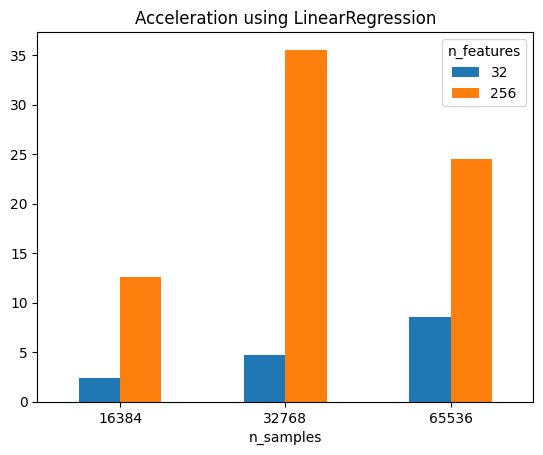

In [ ]:
plot_speedup(df, "LinearRegression")

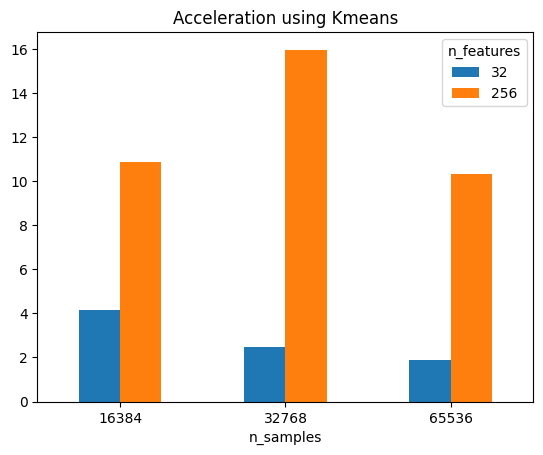

In [ ]:
plot_speedup(df, "Kmeans")

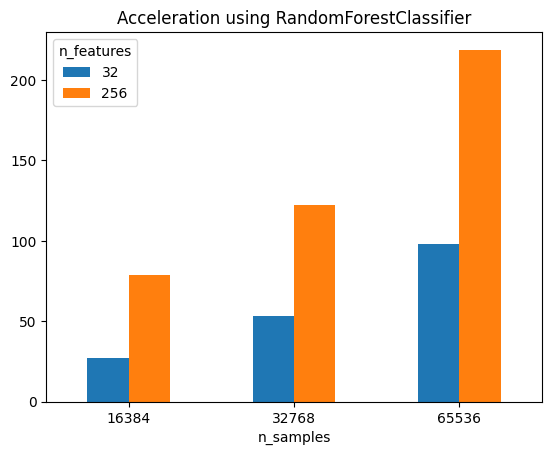

In [ ]:
plot_speedup(df, "RandomForestClassifier")

In [ ]:
def plot_speedup_multi(df):
  df = df[["algo", "n_samples", "speedup"]].groupby(["algo", "n_samples"]).mean()
  df.plot.bar()

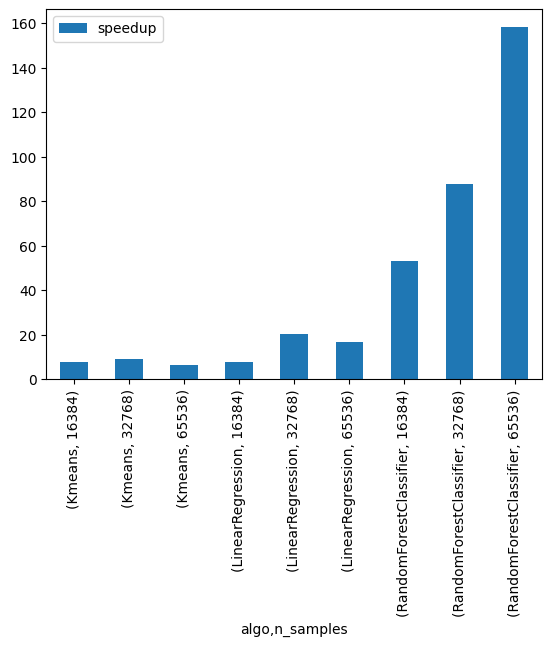

In [ ]:
plot_speedup_multi(df)